# Machine Learning with Penguins

## Libraries

In [36]:
import random

import pandas as pd  # analysis of tabular data
import numpy as np   # fast numerical calculations, linear algebra
import seaborn as sns   # like matplotlib but with nicer plots
import sklearn       # scikit-learn: Machine Learning
from matplotlib import pyplot  # plotting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# other libraries we do not need here
# import tensorflow as tf  # artificial neural networks (deep learning)
# import pytorch           # like tensorflow but by Meta
# import flask             # simple web server to build a public interface
# import spacy             # language processing tools

## Get Data

In [2]:
data = sns.load_dataset("penguins")  # loads them into a pandas table (DataFrame)
data.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
data.shape  # number of rows and cols

(344, 7)

In [4]:
# remove all rows with missing data
data.dropna(inplace=True)
data.shape  # we have now 333 rows and 7 columns

(333, 7)

## Plot the data

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

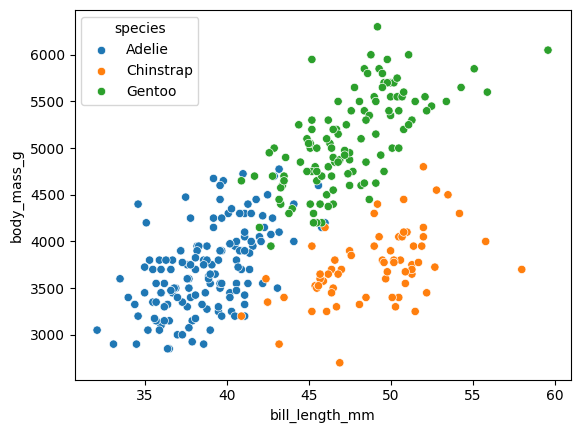

In [5]:
sns.scatterplot(data=data, x="bill_length_mm", y="body_mass_g", hue="species")

## Goal: 
We want to predict the species of a penguin from its body features (e.g. bill length and body mass).

## Split Test Data

In [8]:
train, test = train_test_split(data, test_size=0.2, random_state=42)  # seed for the random number generator

In [9]:
train.shape, test.shape # 266 penguins for training, 67 for testing

((266, 7), (67, 7))

## Dummy Prediction (Baseline Model)

In [11]:
# any model has to be at least as good as this one
dummy = [random.choice(["Adelie","Chinstrap", "Gentoo"]) for _ in range(333)]

## Train a Model

In [13]:
# factorize: convert a column to integer numbers
train["island_fac"] = pd.factorize(train["island"])[0]
test["island_fac"] = pd.factorize(test["island"])[0]

In [72]:
train.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_fac
230,Gentoo,Biscoe,40.9,13.7,214.0,4650.0,Female,0
84,Adelie,Dream,37.3,17.8,191.0,3350.0,Female,1
303,Gentoo,Biscoe,50.0,15.9,224.0,5350.0,Male,0
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female,0
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,Male,0


In [14]:
# the input data for the prediction = input features. X is a matrix
X = train[["bill_length_mm", "body_mass_g", "island_fac"]]  # have to be numerical columns

# the correct output = target variable. y is a vector
y = train["species"]  # ok if this is a category

In [74]:
X.shape, y.shape

((266, 3), (266,))

### Decision Tree

In [27]:
tree_model = DecisionTreeClassifier(max_depth=2)  # only 2 questions are allowed
tree_model.fit(X, y)  # fit with training data

DecisionTreeClassifier(max_depth=2)

### Random Forest

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=2)  # trains 100 trees, they vote
rf_model.fit(X, y)  # fit with training data

RandomForestClassifier(max_depth=2)

### Logistic Regression
a linear model - produces warnings because data is not scaled

In [21]:
logreg_model = LogisticRegression()
logreg_model.fit(X, y)  # fit with training data

/home/kristian/miniconda3/envs/kata/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Other classification methods (ML algorithms)

* Support Vector Machines
* Naive Bayes

DecisionTreeClassifier(max_depth=2)

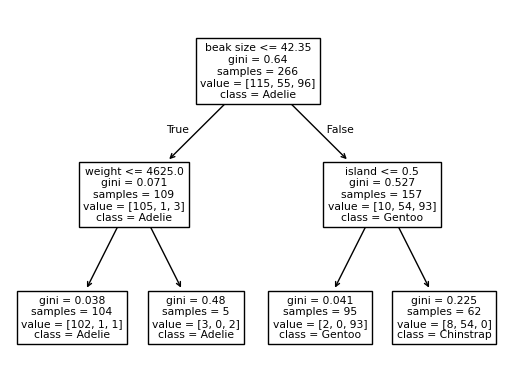

In [28]:
plot_tree(tree_model, feature_names=["beak size", "weight", "island"], class_names=["Adelie", "Chinstrap", "Gentoo"])
_

## Make a prediction

In [30]:
penguin = [[50, 6000, 1]]  # beak_length, weight, island
tree_model.predict(penguin)

/home/kristian/miniconda3/envs/kata/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Chinstrap'], dtype=object)

## Evaluation

### Dummy Model with random predictions

In [17]:
correct = list(data["species"])

In [22]:
# relative number of correct predictions
round(accuracy_score(dummy, correct), 3)

0.324

### Decision tree

In [33]:
ypred = tree_model.predict(X)
round(accuracy_score(ypred, y), 3)

0.947

### Compare with test data

In [34]:
Xtest = test[["bill_length_mm", "body_mass_g", "island_fac"]]
ytest = test["species"]

ypred = tree_model.predict(Xtest)
round(accuracy_score(ypred, ytest), 3)

0.433

### Overfitting:

**Definition: the model has learned specific data point and is not generalizing**

* if the training score is better for the training data: overfitting
* if training and test score are about the same: no overfitting

### Confusion Matrix

alternative evaluation: gives more detail

In [37]:
confusion_matrix(ytest, ypred)

array([[29,  2,  0],
       [ 0,  0, 13],
       [ 0, 23,  0]])

In [ ]:
# rows + columns: Adelie, Chinstrap, Gentoo
# left: true value
# top: predicted value

## Reading Material

* https://jupyter.org/try-jupyter/lab/ - a Jupyter notebook on the web
* https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv  - penguins as CSV